In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

In [47]:
weights = np.load('./Qvalue/TD3300202109011806482904.csv.npy', allow_pickle=True)

In [48]:
weights.item().items()

dict_items([('default_policy', {'policy_model.action_0._model.0.weight': array([[ 1.46356440e+00,  2.15567350e-01, -7.67116696e-02,
         4.22487438e-01, -2.36118421e-01,  5.44058275e+00,
         1.34389412e+00,  6.62458222e-03,  4.92454290e+00,
         1.40601134e+00,  4.75571156e-01,  5.72307706e-01,
         2.02383804e+00, -1.04429150e+00],
       [ 1.65321195e+00, -2.73565680e-01,  1.11640859e+00,
         6.31241143e-01, -2.75513083e-01,  1.28432250e+00,
         6.85079432e+00, -7.00848997e-02,  2.38863134e+00,
         2.42007899e+00,  2.57207811e-01,  1.54466188e+00,
         8.34611177e-01, -1.74396962e-01],
       [-3.01103258e+00,  4.84423256e+00, -2.42560363e+00,
        -1.69585383e+00,  2.58814144e+00, -5.42775917e+00,
         1.66109359e+00, -4.16730851e-01, -3.25455159e-01,
         5.91913462e-01,  1.60272151e-01,  1.10529907e-01,
         1.50611430e-01,  1.94444001e-01],
       [-2.41678134e-01,  2.61741374e-02, -1.66790918e-01,
         4.02772948e-02,  1.760

In [49]:
for key, val in weights.item().items():
    print("key = {key}, value={value}".format(key=key,value=val))
    weights_val = val

key = default_policy, value={'policy_model.action_0._model.0.weight': array([[ 1.46356440e+00,  2.15567350e-01, -7.67116696e-02,
         4.22487438e-01, -2.36118421e-01,  5.44058275e+00,
         1.34389412e+00,  6.62458222e-03,  4.92454290e+00,
         1.40601134e+00,  4.75571156e-01,  5.72307706e-01,
         2.02383804e+00, -1.04429150e+00],
       [ 1.65321195e+00, -2.73565680e-01,  1.11640859e+00,
         6.31241143e-01, -2.75513083e-01,  1.28432250e+00,
         6.85079432e+00, -7.00848997e-02,  2.38863134e+00,
         2.42007899e+00,  2.57207811e-01,  1.54466188e+00,
         8.34611177e-01, -1.74396962e-01],
       [-3.01103258e+00,  4.84423256e+00, -2.42560363e+00,
        -1.69585383e+00,  2.58814144e+00, -5.42775917e+00,
         1.66109359e+00, -4.16730851e-01, -3.25455159e-01,
         5.91913462e-01,  1.60272151e-01,  1.10529907e-01,
         1.50611430e-01,  1.94444001e-01],
       [-2.41678134e-01,  2.61741374e-02, -1.66790918e-01,
         4.02772948e-02,  1.760946

In [50]:
wei_vlist = []
for i in weights_val.items():
    wei_vlist.append(i)

# Q network copy

In [51]:
q_wei = []
q_bias = []
for i in range(6,12):
    if i % 2 == 0:
        q_wei.append(wei_vlist[i])
    else:
        q_bias.append(wei_vlist[i])
        
tq_wei = []
tq_bias = []
for i in range(12,18):
    if i % 2 == 0:
        tq_wei.append(wei_vlist[i])
    else:
        tq_bias.append(wei_vlist[i])

In [52]:
state = [ 0.36260295, -0.16334456, -0.16267242, -1.0 , -0.16617442, -0.16146802,
 -1.0 , 0.00681574,  0.1094747,  -1.0 ,-0.99318426, -0.8905253,
 -1.0 , 1.  ]

action3 = [1, 1.        ]
action2 = [1, 0.        ]
action1 = [1, -1.        ]

# Q_value Over RL's Speed

In [53]:
Abs_v = [state[0] + i for i in state[1:7]]

In [54]:
sp_list_lc3 = [np.concatenate([[i],[j - i for j in Abs_v],state[7:], [action3[0]], [action3[1]]]) for i in np.arange(0., 1.05, .05)]
sp_list_lc2 = [np.concatenate([[i],[j - i for j in Abs_v],state[7:], [action2[0]], [action2[1]]]) for i in np.arange(0., 1.05, .05)]
sp_list_lc1 = [np.concatenate([[i],[j - i for j in Abs_v],state[7:], [action1[0]], [action1[1]]]) for i in np.arange(0., 1.05, .05)]

In [55]:
q_sp_list3 = []
tq_sp_list3 = []

for i in sp_list_lc3:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(q_wei[0][1]),
                          torch.from_numpy(q_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(q_wei[1][1]),
                          torch.from_numpy(q_bias[1][1])))
    out = F.linear(out, torch.from_numpy(q_wei[2][1]),
                   torch.from_numpy(q_bias[2][1]))
    
    q_sp_list3.append(out)

    tout = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(tq_wei[0][1]),
                          torch.from_numpy(tq_bias[0][1])))
    tout = F.relu(F.linear(tout, torch.from_numpy(tq_wei[1][1]),
                          torch.from_numpy(tq_bias[1][1])))
    tout = F.linear(tout, torch.from_numpy(tq_wei[2][1]),
                   torch.from_numpy(tq_bias[2][1]))

    tq_sp_list3.append(tout)

    
q_sp_list2 = []
tq_sp_list2 = []

for i in sp_list_lc2:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(q_wei[0][1]),
                          torch.from_numpy(q_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(q_wei[1][1]),
                          torch.from_numpy(q_bias[1][1])))
    out = F.linear(out, torch.from_numpy(q_wei[2][1]),
                   torch.from_numpy(q_bias[2][1]))
    
    q_sp_list2.append(out)

    tout = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(tq_wei[0][1]),
                          torch.from_numpy(tq_bias[0][1])))
    tout = F.relu(F.linear(tout, torch.from_numpy(tq_wei[1][1]),
                          torch.from_numpy(tq_bias[1][1])))
    tout = F.linear(tout, torch.from_numpy(tq_wei[2][1]),
                   torch.from_numpy(tq_bias[2][1]))

    tq_sp_list2.append(tout)


q_sp_list1 = []
tq_sp_list1 = []

for i in sp_list_lc1:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(q_wei[0][1]),
                          torch.from_numpy(q_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(q_wei[1][1]),
                          torch.from_numpy(q_bias[1][1])))
    out = F.linear(out, torch.from_numpy(q_wei[2][1]),
                   torch.from_numpy(q_bias[2][1]))
    
    q_sp_list1.append(out)

    tout = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(tq_wei[0][1]),
                          torch.from_numpy(tq_bias[0][1])))
    tout = F.relu(F.linear(tout, torch.from_numpy(tq_wei[1][1]),
                          torch.from_numpy(tq_bias[1][1])))
    tout = F.linear(tout, torch.from_numpy(tq_wei[2][1]),
                   torch.from_numpy(tq_bias[2][1]))

    tq_sp_list1.append(tout)


Text(0.5, 1.0, "Q over RL's speed")

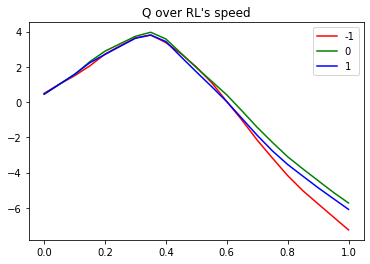

In [56]:
# Q graph
plt.plot(np.arange(0., 1.05, .05), q_sp_list1, color='r')
plt.plot(np.arange(0., 1.05, .05), q_sp_list2, color='g')
plt.plot(np.arange(0., 1.05, .05), q_sp_list3, color='b')


plt.legend(['-1','0','1'])
plt.title("Q over RL's speed")

Text(0.5, 1.0, "twin Q over RL's speed")

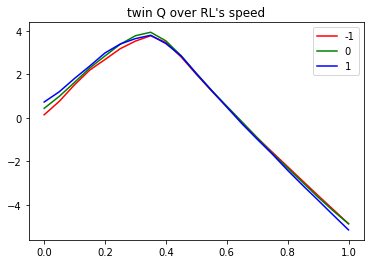

In [57]:
# twin Q graph
plt.plot(np.arange(0., 1.05, .05), tq_sp_list1, color='r')
plt.plot(np.arange(0., 1.05, .05), tq_sp_list2, color='g')
plt.plot(np.arange(0., 1.05, .05), tq_sp_list3, color='b')

plt.legend(['-1','0','1'])
plt.title("twin Q over RL's speed")

Text(0.5, 1.0, "minimum Q over RL's speed")

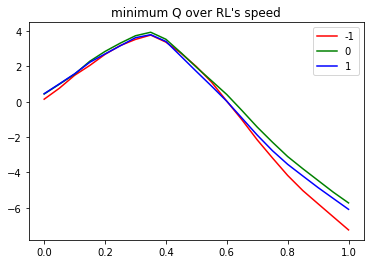

In [58]:
# Minimum of Q w.r.t Speed 
sp1 = pd.DataFrame([ x for x in zip(q_sp_list1, tq_sp_list1)])
Min1 = [min(sp1[0][i],sp1[1][i]) for i in range(0,21)]
sp1['Min'] = Min1

sp2 = pd.DataFrame([ x for x in zip(q_sp_list2, tq_sp_list2)])
Min2 = [min(sp2[0][i],sp2[1][i]) for i in range(0,21)]
sp2['Min'] = Min2

sp3 = pd.DataFrame([ x for x in zip(q_sp_list3, tq_sp_list3)])
Min3 = [min(sp3[0][i],sp3[1][i]) for i in range(0,21)]
sp3['Min'] = Min3

plt.plot(np.arange(0., 1.05, .05), Min1, color='r')
plt.plot(np.arange(0., 1.05, .05), Min2, color='g')
plt.plot(np.arange(0., 1.05, .05), Min3, color='b')

plt.legend(['-1','0','1'])
plt.title("minimum Q over RL's speed")

# Q_value Over Headway with Lane Leader

In [59]:
#2 번 차선
lh_list = []
for i in np.arange(0.01,0.161,0.01):
    lh_list.append([i + j for j in state[7:13]])
    
lh_list_lc3 = [np.concatenate([state[:7], [j + i for j in state[7:13]], [state[13]], [action3[0]], [action3[1]]]) for i in np.arange(0.01,0.161,0.01)]
lh_list_lc2 = [np.concatenate([state[:7], [j + i for j in state[7:13]], [state[13]], [action2[0]], [action2[1]]]) for i in np.arange(0.01,0.161,0.01)]
lh_list_lc1 = [np.concatenate([state[:7], [j + i for j in state[7:13]], [state[13]], [action1[0]], [action1[1]]]) for i in np.arange(0.01,0.161,0.01)]

In [60]:
# 1 번 차선
# lh_list_lc3 = [np.concatenate([state[:8],[i],state[9:], [action3[0]], [action3[1]]]) for i in np.arange(0.1, 1.05, .05)]
# lh_list_lc2 = [np.concatenate([state[:8],[i],state[9:], [action2[0]], [action2[1]]]) for i in np.arange(0.1, 1.05, .05)]
# lh_list_lc1 = [np.concatenate([state[:8],[i],state[9:], [action1[0]], [action1[1]]]) for i in np.arange(0.1, 1.05, .05)]

In [61]:
q_lh_list3 = []
tq_lh_list3 = []

for i in lh_list_lc3:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(q_wei[0][1]),
                          torch.from_numpy(q_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(q_wei[1][1]),
                          torch.from_numpy(q_bias[1][1])))
    out = F.linear(out, torch.from_numpy(q_wei[2][1]),
                   torch.from_numpy(q_bias[2][1]))
    
    q_lh_list3.append(out)

    tout = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(tq_wei[0][1]),
                          torch.from_numpy(tq_bias[0][1])))
    tout = F.relu(F.linear(tout, torch.from_numpy(tq_wei[1][1]),
                          torch.from_numpy(tq_bias[1][1])))
    tout = F.linear(tout, torch.from_numpy(tq_wei[2][1]),
                   torch.from_numpy(tq_bias[2][1]))

    tq_lh_list3.append(tout)

    
q_lh_list2 = []
tq_lh_list2 = []

for i in lh_list_lc2:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(q_wei[0][1]),
                          torch.from_numpy(q_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(q_wei[1][1]),
                          torch.from_numpy(q_bias[1][1])))
    out = F.linear(out, torch.from_numpy(q_wei[2][1]),
                   torch.from_numpy(q_bias[2][1]))
    
    q_lh_list2.append(out)

    tout = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(tq_wei[0][1]),
                          torch.from_numpy(tq_bias[0][1])))
    tout = F.relu(F.linear(tout, torch.from_numpy(tq_wei[1][1]),
                          torch.from_numpy(tq_bias[1][1])))
    tout = F.linear(tout, torch.from_numpy(tq_wei[2][1]),
                   torch.from_numpy(tq_bias[2][1]))

    tq_lh_list2.append(tout)


q_lh_list1 = []
tq_lh_list1 = []

for i in lh_list_lc1:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(q_wei[0][1]),
                          torch.from_numpy(q_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(q_wei[1][1]),
                          torch.from_numpy(q_bias[1][1])))
    out = F.linear(out, torch.from_numpy(q_wei[2][1]),
                   torch.from_numpy(q_bias[2][1]))
    
    q_lh_list1.append(out)

    tout = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(tq_wei[0][1]),
                          torch.from_numpy(tq_bias[0][1])))
    tout = F.relu(F.linear(tout, torch.from_numpy(tq_wei[1][1]),
                          torch.from_numpy(tq_bias[1][1])))
    tout = F.linear(tout, torch.from_numpy(tq_wei[2][1]),
                   torch.from_numpy(tq_bias[2][1]))

    tq_lh_list1.append(tout)


Text(0.5, 1.0, 'Q over headway of lane leader')

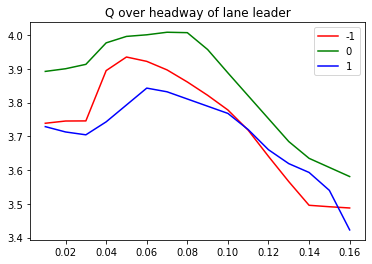

In [62]:
# Q graph
plt.plot(np.arange(0.01, 0.161, .01), q_lh_list1, color='r')
plt.plot(np.arange(0.01, 0.161, .01), q_lh_list2, color='g')
plt.plot(np.arange(0.01, 0.161, .01), q_lh_list3, color='b')
plt.legend(['-1','0','1'])
plt.title("Q over headway of lane leader")

Text(0.5, 1.0, 'twin Q over headway of lane leader')

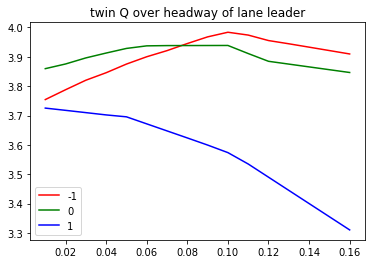

In [63]:
# Q graph
plt.plot(np.arange(0.01, 0.161, .01), tq_lh_list1, color='r')
plt.plot(np.arange(0.01, 0.161, .01), tq_lh_list2, color='g')
plt.plot(np.arange(0.01, 0.161, .01), tq_lh_list3, color='b')
plt.legend(['-1','0','1'])
plt.title("twin Q over headway of lane leader")

Text(0.5, 1.0, 'minimum Q over headway of lane leader')

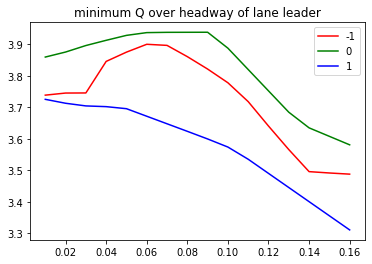

In [64]:
# Minimum of Q w.r.t LH 
lh1 = pd.DataFrame([ x for x in zip(q_lh_list1, tq_lh_list1)])
Min1 = [min(lh1[0][i],lh1[1][i]) for i in range(0,16)]
lh1['Min'] = Min1

lh2 = pd.DataFrame([ x for x in zip(q_lh_list2, tq_lh_list2)])
Min2 = [min(lh2[0][i],lh2[1][i]) for i in range(0,16)]
lh2['Min'] = Min2

lh3 = pd.DataFrame([ x for x in zip(q_lh_list3, tq_lh_list3)])
Min3 = [min(lh3[0][i],lh3[1][i]) for i in range(0,16)]
lh3['Min'] = Min3

plt.plot(np.arange(0.01, 0.161, .01), Min1, color='r')
plt.plot(np.arange(0.01, 0.161, .01), Min2, color='g')
plt.plot(np.arange(0.01, 0.161, .01), Min3, color='b')

plt.legend(['-1','0','1'])
plt.title("minimum Q over headway of lane leader")

# Q_value Over RL's Acceleration

In [65]:
Acc_list_lc3 = [np.concatenate([state, [i], [action3[1]]]) for i in np.arange(-1, 1.1, .1)]
Acc_list_lc2 = [np.concatenate([state, [i], [action2[1]]]) for i in np.arange(-1, 1.1, .1)]
Acc_list_lc1 = [np.concatenate([state, [i], [action1[1]]]) for i in np.arange(-1, 1.1, .1)]

In [66]:
q_acc_list3 = []
tq_acc_list3 = []

for i in Acc_list_lc3:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(q_wei[0][1]),
                          torch.from_numpy(q_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(q_wei[1][1]),
                          torch.from_numpy(q_bias[1][1])))
    out = F.linear(out, torch.from_numpy(q_wei[2][1]),
                   torch.from_numpy(q_bias[2][1]))
    
    q_acc_list3.append(out)

    tout = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(tq_wei[0][1]),
                          torch.from_numpy(tq_bias[0][1])))
    tout = F.relu(F.linear(tout, torch.from_numpy(tq_wei[1][1]),
                          torch.from_numpy(tq_bias[1][1])))
    tout = F.linear(tout, torch.from_numpy(tq_wei[2][1]),
                   torch.from_numpy(tq_bias[2][1]))

    tq_acc_list3.append(tout)

    
q_acc_list2 = []
tq_acc_list2 = []

for i in Acc_list_lc2:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(q_wei[0][1]),
                          torch.from_numpy(q_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(q_wei[1][1]),
                          torch.from_numpy(q_bias[1][1])))
    out = F.linear(out, torch.from_numpy(q_wei[2][1]),
                   torch.from_numpy(q_bias[2][1]))
    
    q_acc_list2.append(out)

    tout = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(tq_wei[0][1]),
                          torch.from_numpy(tq_bias[0][1])))
    tout = F.relu(F.linear(tout, torch.from_numpy(tq_wei[1][1]),
                          torch.from_numpy(tq_bias[1][1])))
    tout = F.linear(tout, torch.from_numpy(tq_wei[2][1]),
                   torch.from_numpy(tq_bias[2][1]))

    tq_acc_list2.append(tout)


q_acc_list1 = []
tq_acc_list1 = []

for i in Acc_list_lc1:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(q_wei[0][1]),
                          torch.from_numpy(q_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(q_wei[1][1]),
                          torch.from_numpy(q_bias[1][1])))
    out = F.linear(out, torch.from_numpy(q_wei[2][1]),
                   torch.from_numpy(q_bias[2][1]))
    
    q_acc_list1.append(out)

    tout = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(tq_wei[0][1]),
                          torch.from_numpy(tq_bias[0][1])))
    tout = F.relu(F.linear(tout, torch.from_numpy(tq_wei[1][1]),
                          torch.from_numpy(tq_bias[1][1])))
    tout = F.linear(tout, torch.from_numpy(tq_wei[2][1]),
                   torch.from_numpy(tq_bias[2][1]))

    tq_acc_list1.append(tout)


Text(0.5, 1.0, 'Q over acceleration')

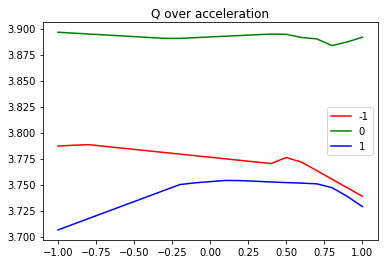

In [67]:
# Q graph
plt.plot(np.arange(-1, 1.1, .1), q_acc_list1, color='r')
plt.plot(np.arange(-1, 1.1, .1), q_acc_list2, color='g')
plt.plot(np.arange(-1, 1.1, .1), q_acc_list3, color='b')
plt.legend(['-1','0','1'])
plt.title("Q over acceleration")

Text(0.5, 1.0, 'twin Q over acceleration')

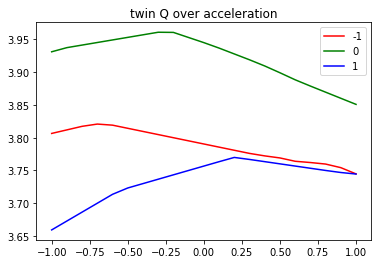

In [68]:
# twin_Q graph
plt.plot(np.arange(-1, 1.1, .1), tq_acc_list1, color='r')
plt.plot(np.arange(-1, 1.1, .1), tq_acc_list2, color='g')
plt.plot(np.arange(-1, 1.1, .1), tq_acc_list3, color='b')
plt.legend(['-1','0','1'])
plt.title("twin Q over acceleration")

(array([3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85, 3.9 , 3.95]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

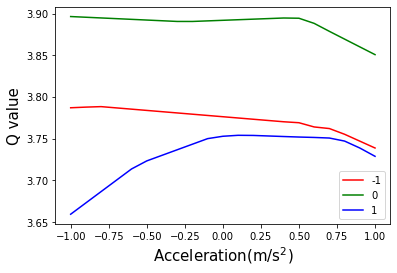

In [69]:
# Minimum of Q w.r.t LH 
acc1 = pd.DataFrame([ x for x in zip(q_acc_list1, tq_acc_list1)])
Min1 = [min(acc1[0][i],acc1[1][i]) for i in range(0,21)]
acc1['Min'] = Min1

acc2 = pd.DataFrame([ x for x in zip(q_acc_list2, tq_acc_list2)])
Min2 = [min(acc2[0][i],acc2[1][i]) for i in range(0,21)]
acc2['Min'] = Min2

acc3 = pd.DataFrame([ x for x in zip(q_acc_list3, tq_acc_list3)])
Min3 = [min(acc3[0][i],acc3[1][i]) for i in range(0,21)]
acc3['Min'] = Min3

plt.plot(np.arange(-1, 1.1, .1), Min1, color='r')
plt.plot(np.arange(-1, 1.1, .1), Min2, color='g')
plt.plot(np.arange(-1, 1.1, .1), Min3, color='b')

plt.legend(['-1','0','1'])
plt.ylabel('Q value',fontsize=15)
plt.xlabel("Acceleration(m/s$^{2}$)",fontsize=15)
plt.xticks(fontsize =10)
plt.yticks(fontsize =10)

# LC

In [70]:
LC_list = [np.concatenate([state, [action1[0]], [i]]) for i in np.arange(-1, 1.01, .01)]

In [71]:
q_lc_list1 = []
tq_lc_list1 = []

for i in LC_list:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(q_wei[0][1]),
                          torch.from_numpy(q_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(q_wei[1][1]),
                          torch.from_numpy(q_bias[1][1])))
    out = F.linear(out, torch.from_numpy(q_wei[2][1]),
                   torch.from_numpy(q_bias[2][1]))
    
    q_lc_list1.append(out)

    tout = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(tq_wei[0][1]),
                          torch.from_numpy(tq_bias[0][1])))
    tout = F.relu(F.linear(tout, torch.from_numpy(tq_wei[1][1]),
                          torch.from_numpy(tq_bias[1][1])))
    tout = F.linear(tout, torch.from_numpy(tq_wei[2][1]),
                   torch.from_numpy(tq_bias[2][1]))

    tq_lc_list1.append(tout)

Text(0.5, 1.0, 'Q over LC')

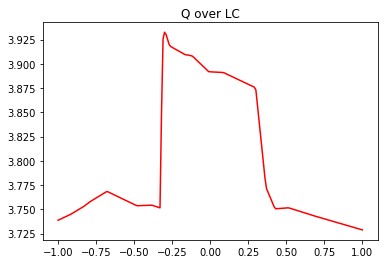

In [72]:
# Q graph
plt.plot(np.arange(-1, 1.01, .01), q_lc_list1, color='r')
plt.title("Q over LC")

Text(0.5, 1.0, 'twin Q over LC')

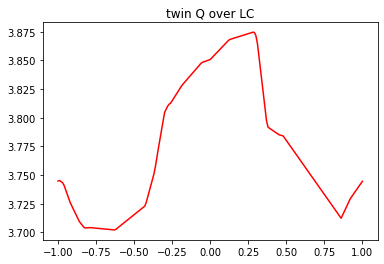

In [73]:
# twin Q graph
plt.plot(np.arange(-1, 1.01, .01), tq_lc_list1, color='r')
plt.title("twin Q over LC")

(array([57.15, 57.2 , 57.25, 57.3 , 57.35, 57.4 , 57.45, 57.5 , 57.55]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

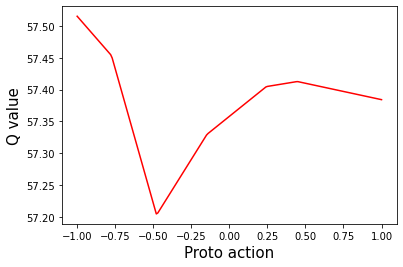

In [30]:
# Minimum of Q w.r.t LH 
lcmin = pd.DataFrame([ x for x in zip(q_lc_list1, tq_lc_list1)])
lcMin1 = [min(lcmin[0][i],lcmin[1][i]) for i in range(0,201)]
lcmin['Min'] = lcMin1

plt.plot(np.arange(-1, 1.01, .01), lcMin1, color='r')
plt.ylabel('Q value',fontsize =15)
plt.xlabel('Proto action',fontsize =15)
plt.xticks(fontsize =10)
plt.yticks(fontsize =10)

# Actor copy

In [31]:
ac_wei = []
ac_bias = []
for i in range(0,6):
    if i % 2 == 0:
        ac_wei.append(wei_vlist[i])
    else:
        ac_bias.append(wei_vlist[i])

In [32]:
sp_list_lc3 = [np.concatenate([[i],[j - i for j in Abs_v],state[7:], [action3[0]], [action3[1]]]) for i in np.arange(0., 1.05, .05)]
sp_list_lc2 = [np.concatenate([[i],[j - i for j in Abs_v],state[7:], [action2[0]], [action2[1]]]) for i in np.arange(0., 1.05, .05)]
sp_list_lc1 = [np.concatenate([[i],[j - i for j in Abs_v],state[7:], [action1[0]], [action1[1]]]) for i in np.arange(0., 1.05, .05)]

In [33]:
sp_list_lc = [np.concatenate([[i],[j - i for j in Abs_v], state[7:]]) for i in np.arange(0., 1.01, .01)]

In [34]:
acc_sp_list = []
lc_sp_list = []

for i in sp_list_lc:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(ac_wei[0][1]),
                          torch.from_numpy(ac_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(ac_wei[1][1]),
                          torch.from_numpy(ac_bias[1][1])))
    out = torch.tanh(F.linear(out, torch.from_numpy(ac_wei[2][1]),
                   torch.from_numpy(ac_bias[2][1])))
    
    acc_sp_list.append(out[0])
    lc_sp_list.append(out[1])

Text(0.5, 0, 'velocity(m/s)')

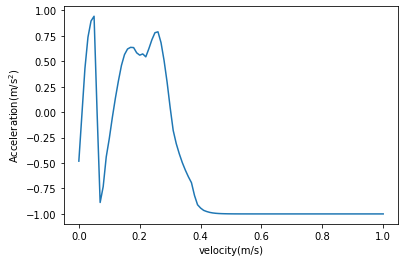

In [35]:
plt.plot(np.arange(0., 1.01, .01), acc_sp_list)
# plt.axvline(x=0.35,color='r')
plt.ylabel("Acceleration(m/s$^{2}$)")
plt.xlabel('velocity(m/s)')

Text(0.5, 0, 'rl_speed')

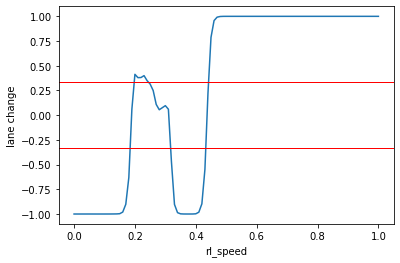

In [36]:
plt.plot(np.arange(0., 1.01, .01), lc_sp_list)
plt.axhline(y=0.333, color='r', linewidth=1)
plt.axhline(y=-0.333, color='r', linewidth=1)
plt.ylabel('lane change')
plt.xlabel('rl_speed')

In [37]:
lh_list = []
for i in np.arange(0.01,0.161,0.01):
    lh_list.append([i + j for j in state[7:13]])

lh_list_lc = [np.concatenate([state[:7],i,[state[13]]]) for i in lh_list]

In [38]:
acc_lh_list = []
lc_lh_list = []

for i in lh_list_lc:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(ac_wei[0][1]),
                          torch.from_numpy(ac_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(ac_wei[1][1]),
                          torch.from_numpy(ac_bias[1][1])))
    out = torch.tanh(F.linear(out, torch.from_numpy(ac_wei[2][1]),
                   torch.from_numpy(ac_bias[2][1])))
    
    acc_lh_list.append(out[0])
    lc_lh_list.append(out[1])

Text(0.5, 0, 'addition value w.r.t LH')

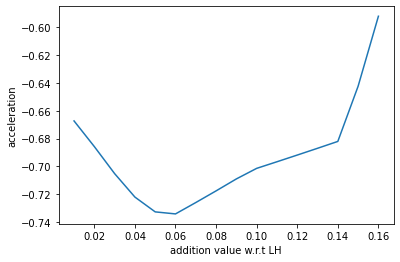

In [39]:
plt.plot(np.arange(0.01,0.161,0.01), acc_lh_list)
plt.ylabel('acceleration')
plt.xlabel('addition value w.r.t LH')

Text(0.5, 0, 'addition value w.r.t LH')

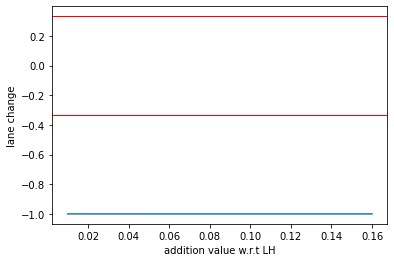

In [40]:
plt.plot(np.arange(0.01,0.161,0.01), lc_lh_list)
plt.axhline(y=0.333, color='r', linewidth=1)
plt.axhline(y=-0.333, color='r', linewidth=1)
plt.ylabel('lane change')
plt.xlabel('addition value w.r.t LH')

# Execution Validation

In [41]:
exv = pd.read_csv("./0812overnight/3200202108122137222.csv",names=['s0','s1','s2','s3','s4','s5','s6'
                                                                   ,'s7','s8','s9','a0','a1'], delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: './0812overnight/3200202108122137222.csv'

In [ ]:
exv

string transtion

In [ ]:
exv['s0']= exv['s0'].str.replace("[","")
exv['s9']= exv['s9'].str.replace("]","")
exv['a0']= exv['a0'].str.replace("[","")
exv['a1']= exv['a1'].str.replace("]","")
exv['a1']= exv['a1'].str.replace(" ","")
exv['a0']= exv['a0'].str.replace(" ","")
exv['s9']= exv['s9'].str.replace(" ","")
exv['a1']=pd.to_numeric(exv['a1'])
exv['a0']=pd.to_numeric(exv['a0'])
exv['s0']=pd.to_numeric(exv['s0'])
exv['s9']=pd.to_numeric(exv['s9'])

In [ ]:
bad_negative_lc_state = []
bad_positive_lc_state = []
for i in range(0,3000):
    if exv['s9'][i] == 0 :
        if exv['s7'][i] > exv['s8'][i] and exv['a1'][i] == 1:
            bad_positive_lc_state.append(exv.loc[i][0:10].to_numpy())
            
            
for i in range(0,3000):
    if exv['s9'][i] == 1 :
        if exv['s7'][i] < exv['s8'][i] and exv['a1'][i] == -1:
            bad_negative_lc_state.append(exv.loc[i][0:10].to_numpy())

In [42]:
print(len(bad_negative_lc_state),len(bad_positive_lc_state))

NameError: name 'bad_negative_lc_state' is not defined

In [43]:
bnls = []
bpls = []

for i in bad_negative_lc_state:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(ac_wei[0][1]),
                          torch.from_numpy(ac_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(ac_wei[1][1]),
                          torch.from_numpy(ac_bias[1][1])))
    out = torch.tanh(F.linear(out, torch.from_numpy(ac_wei[2][1]),
                   torch.from_numpy(ac_bias[2][1])))
    
    bnls.append(out[1])
    
for i in bad_positive_lc_state:
    out = F.relu(F.linear(torch.from_numpy(i).float(), torch.from_numpy(ac_wei[0][1]),
                          torch.from_numpy(ac_bias[0][1])))
    out = F.relu(F.linear(out, torch.from_numpy(ac_wei[1][1]),
                          torch.from_numpy(ac_bias[1][1])))
    out = torch.tanh(F.linear(out, torch.from_numpy(ac_wei[2][1]),
                   torch.from_numpy(ac_bias[2][1])))
    
    bpls.append(out[1])

NameError: name 'bad_negative_lc_state' is not defined

In [44]:
plt.plot(range(0,len(bad_negative_lc_state)), bnls)
plt.axhline(y=0.333, color='r', linewidth=1)
plt.axhline(y=-0.333, color='r', linewidth=1)
plt.ylabel('lane change')
plt.title('bad negative lane change')

NameError: name 'bad_negative_lc_state' is not defined

In [45]:
plt.plot(range(0,len(bad_positive_lc_state)), bpls)
plt.axhline(y=0.333, color='r', linewidth=1)
plt.axhline(y=-0.333, color='r', linewidth=1)
plt.ylabel('lane change')
plt.title('bad positive lane change')

NameError: name 'bad_positive_lc_state' is not defined

In [46]:
x = torch.randn(10, 10) # your input
weight = nn.Parameter(torch.from_numpy(np.random.randn(10, 10)).float())
bias = nn.Parameter(torch.from_numpy(np.random.randn(10)).float())

optimizer = torch.optim.SGD([weight] + [bias], lr=1e-3)
target = torch.randn(10, 10)
criterion = nn.MSELoss()

for epoch in range(10):
    optimizer.zero_grad()
    out = F.relu(F.linear(x, weight, bias))
    loss = criterion(out, target)
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 6.826309680938721
epoch 1, loss 6.822028636932373
epoch 2, loss 6.817752838134766
epoch 3, loss 6.813478946685791
epoch 4, loss 6.809209823608398
epoch 5, loss 6.804942607879639
epoch 6, loss 6.800680160522461
epoch 7, loss 6.796420097351074
epoch 8, loss 6.7921648025512695
epoch 9, loss 6.787911891937256


/home/bmil/snap/jupyter/common/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


In [ ]:
import numpy as np

In [ ]:
a = np.array([1,2,3,4])

In [220]:
out = F.relu(F.linear(state, wei1, bias1))
print(out)
out = F.relu(F.linear(out, wei2, bias2))
print(out)
out = torch.tanh(F.linear(out, weif, biasf))
print(out)

NameError: name 'wei1' is not defined

In [ ]:
a

In [ ]:
a + [1]

In [ ]:
np.concatenate([a,[1]])